In [ ]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn import metrics
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import MinMaxScaler

import statsmodels.formula.api as smf

In [ ]:
df = pd.read_csv('CarPrice_Assignment.csv')

df.head()

,car_ID,symboling,CarName,fueltype,aspiration,doornumber,carbody,drivewheel,enginelocation,wheelbase,...,enginesize,fuelsystem,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price
0,1,3,alfa-romero giulia,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,13495.0
1,2,3,alfa-romero stelvio,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,16500.0
2,3,1,alfa-romero Quadrifoglio,gas,std,two,hatchback,rwd,front,94.5,...,152,mpfi,2.68,3.47,9.0,154,5000,19,26,16500.0
3,4,2,audi 100 ls,gas,std,four,sedan,fwd,front,99.8,...,109,mpfi,3.19,3.40,10.0,102,5500,24,30,13950.0
4,5,2,audi 100ls,gas,std,four,sedan,4wd,front,99.4,...,136,mpfi,3.19,3.40,8.0,115,5500,18,22,17450.0


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 205 entries, 0 to 204
Data columns (total 26 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   car_ID            205 non-null    int64  
 1   symboling         205 non-null    int64  
 2   CarName           205 non-null    object 
 3   fueltype          205 non-null    object 
 4   aspiration        205 non-null    object 
 5   doornumber        205 non-null    object 
 6   carbody           205 non-null    object 
 7   drivewheel        205 non-null    object 
 8   enginelocation    205 non-null    object 
 9   wheelbase         205 non-null    float64
 10  carlength         205 non-null    float64
 11  carwidth          205 non-null    float64
 12  carheight         205 non-null    float64
 13  curbweight        205 non-null    int64  
 14  enginetype        205 non-null    object 
 15  cylindernumber    205 non-null    object 
 16  enginesize        205 non-null    int64  
 1

In [ ]:
df.describe()

,car_ID,symboling,wheelbase,carlength,carwidth,carheight,curbweight,enginesize,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price
count,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000
mean,103.000000,0.834146,98.756585,174.049268,65.907805,53.724878,2555.565854,126.907317,3.329756,3.255415,10.142537,104.117073,5125.121951,25.219512,30.751220,13276.710571
std,59.322565,1.245307,6.021776,12.337289,2.145204,2.443522,520.680204,41.642693,0.270844,0.313597,3.972040,39.544167,476.985643,6.542142,6.886443,7988.852332
min,1.000000,-2.000000,86.600000,141.100000,60.300000,47.800000,1488.000000,61.000000,2.540000,2.070000,7.000000,48.000000,4150.000000,13.000000,16.000000,5118.000000
25%,52.000000,0.000000,94.500000,166.300000,64.100000,52.000000,2145.000000,97.000000,3.150000,3.110000,8.600000,70.000000,4800.000000,19.000000,25.000000,7788.000000
50%,103.000000,1.000000,97.000000,173.200000,65.500000,54.100000,2414.000000,120.000000,3.310000,3.290000,9.000000,95.000000,5200.000000,24.000000,30.000000,10295.000000
75%,154.000000,2.000000,102.400000,183.100000,66.900000,55.500000,2935.000000,141.000000,3.580000,3.410000,9.400000,116.000000,5500.000000,30.000000,34.000000,16503.000000
max,205.000000,3.000000,120.900000,208.100000,72.300000,59.800000,4066.000000,326.000000,3.940000,4.170000,23.000000,288.000000,6600.000000,49.000000,54.000000,45400.000000


In [ ]:
df['car_ID'] = df['car_ID'].astype(str)
df['CarName'] = df['CarName'].astype(str)
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 205 entries, 0 to 204
Data columns (total 26 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   car_ID            205 non-null    object 
 1   symboling         205 non-null    int64  
 2   CarName           205 non-null    object 
 3   fueltype          205 non-null    object 
 4   aspiration        205 non-null    object 
 5   doornumber        205 non-null    object 
 6   carbody           205 non-null    object 
 7   drivewheel        205 non-null    object 
 8   enginelocation    205 non-null    object 
 9   wheelbase         205 non-null    float64
 10  carlength         205 non-null    float64
 11  carwidth          205 non-null    float64
 12  carheight         205 non-null    float64
 13  curbweight        205 non-null    int64  
 14  enginetype        205 non-null    object 
 15  cylindernumber    205 non-null    object 
 16  enginesize        205 non-null    int64  
 1

In [ ]:
df.head()

,car_ID,symboling,CarName,fueltype,aspiration,doornumber,carbody,drivewheel,enginelocation,wheelbase,...,enginesize,fuelsystem,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price
0,1,3,alfa-romero giulia,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,13495.0
1,2,3,alfa-romero stelvio,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,16500.0
2,3,1,alfa-romero Quadrifoglio,gas,std,two,hatchback,rwd,front,94.5,...,152,mpfi,2.68,3.47,9.0,154,5000,19,26,16500.0
3,4,2,audi 100 ls,gas,std,four,sedan,fwd,front,99.8,...,109,mpfi,3.19,3.40,10.0,102,5500,24,30,13950.0
4,5,2,audi 100ls,gas,std,four,sedan,4wd,front,99.4,...,136,mpfi,3.19,3.40,8.0,115,5500,18,22,17450.0


In [ ]:
le = LabelEncoder()

# CarName
le.fit(df.CarName)
df.CarName = le.transform(df.CarName)

# FuelType
le.fit(df.fueltype)
df.fueltype = le.transform(df.fueltype)

# Aspiration
le.fit(df.aspiration)
df.aspiration = le.transform(df.aspiration)

# DoorNumber
le.fit(df.doornumber)
df.doornumber = le.transform(df.doornumber)

# CarBody
le.fit(df.carbody)
df.carbody = le.transform(df.carbody)

# Drivewheel
le.fit(df.drivewheel)
df.drivewheel = le.transform(df.drivewheel)

# EngineLoc
le.fit(df.enginelocation)
df.enginelocation = le.transform(df.enginelocation)

# EngineType
le.fit(df.enginetype)
df.enginetype = le.transform(df.enginetype)

# CylinderNum
le.fit(df.cylindernumber)
df.cylindernumber = le.transform(df.cylindernumber)

# FuelSys
le.fit(df.fuelsystem)
df.fuelsystem = le.transform(df.fuelsystem)

# FuelSys
le.fit(df.fuelsystem)
df.fuelsystem = le.transform(df.fuelsystem)

df.head()

,car_ID,symboling,CarName,fueltype,aspiration,doornumber,carbody,drivewheel,enginelocation,wheelbase,...,enginesize,fuelsystem,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price
0,1,3,2,1,0,1,0,2,0,88.6,...,130,5,3.47,2.68,9.0,111,5000,21,27,13495.0
1,2,3,3,1,0,1,0,2,0,88.6,...,130,5,3.47,2.68,9.0,111,5000,21,27,16500.0
2,3,1,1,1,0,1,2,2,0,94.5,...,152,5,2.68,3.47,9.0,154,5000,19,26,16500.0
3,4,2,4,1,0,0,3,1,0,99.8,...,109,5,3.19,3.40,10.0,102,5500,24,30,13950.0
4,5,2,5,1,0,0,3,0,0,99.4,...,136,5,3.19,3.40,8.0,115,5500,18,22,17450.0


<Axes: xlabel='price', ylabel='Count'>

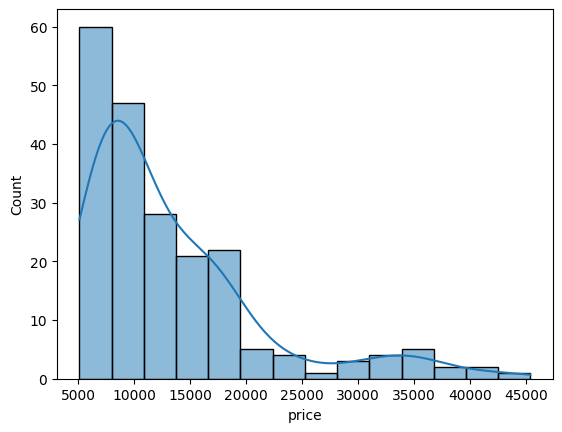

In [ ]:
sns.histplot(data=df, x="price", kde=True)

In [ ]:
df.describe()

,symboling,CarName,fueltype,aspiration,doornumber,carbody,drivewheel,enginelocation,wheelbase,carlength,...,enginesize,fuelsystem,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price
count,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,...,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000
mean,0.834146,77.209756,0.902439,0.180488,0.439024,2.614634,1.326829,0.014634,98.756585,174.049268,...,126.907317,3.253659,3.329756,3.255415,10.142537,104.117073,5125.121951,25.219512,30.751220,13276.710571
std,1.245307,41.014583,0.297446,0.385535,0.497483,0.859081,0.556171,0.120377,6.021776,12.337289,...,41.642693,2.013204,0.270844,0.313597,3.972040,39.544167,476.985643,6.542142,6.886443,7988.852332
min,-2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,86.600000,141.100000,...,61.000000,0.000000,2.540000,2.070000,7.000000,48.000000,4150.000000,13.000000,16.000000,5118.000000
25%,0.000000,44.000000,1.000000,0.000000,0.000000,2.000000,1.000000,0.000000,94.500000,166.300000,...,97.000000,1.000000,3.150000,3.110000,8.600000,70.000000,4800.000000,19.000000,25.000000,7788.000000
50%,1.000000,80.000000,1.000000,0.000000,0.000000,3.000000,1.000000,0.000000,97.000000,173.200000,...,120.000000,5.000000,3.310000,3.290000,9.000000,95.000000,5200.000000,24.000000,30.000000,10295.000000
75%,2.000000,115.000000,1.000000,0.000000,1.000000,3.000000,2.000000,0.000000,102.400000,183.100000,...,141.000000,5.000000,3.580000,3.410000,9.400000,116.000000,5500.000000,30.000000,34.000000,16503.000000
max,3.000000,146.000000,1.000000,1.000000,1.000000,4.000000,2.000000,1.000000,120.900000,208.100000,...,326.000000,7.000000,3.940000,4.170000,23.000000,288.000000,6600.000000,49.000000,54.000000,45400.000000


In [ ]:
scaler = MinMaxScaler()


df_norm = pd.DataFrame(scaler.fit_transform(df), index=df.index, columns=df.columns)

df_norm.describe()

,car_ID,symboling,CarName,fueltype,aspiration,doornumber,carbody,drivewheel,enginelocation,wheelbase,...,enginesize,fuelsystem,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price
count,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,...,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000
mean,0.500000,0.566829,0.528834,0.902439,0.180488,0.439024,0.653659,0.663415,0.014634,0.354419,...,0.248707,0.464808,0.564111,0.564483,0.196409,0.233821,0.398009,0.339431,0.388190,0.202540
std,0.290797,0.249061,0.280922,0.297446,0.385535,0.497483,0.214770,0.278085,0.120377,0.175562,...,0.157142,0.287601,0.193460,0.149332,0.248253,0.164767,0.194688,0.181726,0.181222,0.198323
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.250000,0.400000,0.301370,1.000000,0.000000,0.000000,0.500000,0.500000,0.000000,0.230321,...,0.135849,0.142857,0.435714,0.495238,0.100000,0.091667,0.265306,0.166667,0.236842,0.066283
50%,0.500000,0.600000,0.547945,1.000000,0.000000,0.000000,0.750000,0.500000,0.000000,0.303207,...,0.222642,0.714286,0.550000,0.580952,0.125000,0.195833,0.428571,0.305556,0.368421,0.128519
75%,0.750000,0.800000,0.787671,1.000000,0.000000,1.000000,0.750000,1.000000,0.000000,0.460641,...,0.301887,0.714286,0.742857,0.638095,0.150000,0.283333,0.551020,0.472222,0.473684,0.282632
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


<Axes: xlabel='price', ylabel='Count'>

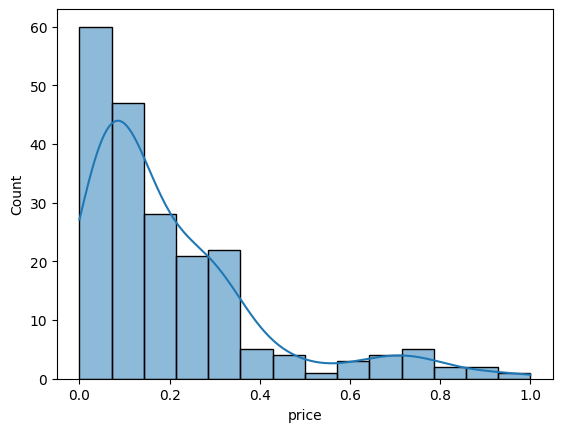

In [ ]:
sns.histplot(data=df_norm, x="price", kde=True)

<Axes: xlabel='CarName', ylabel='Count'>

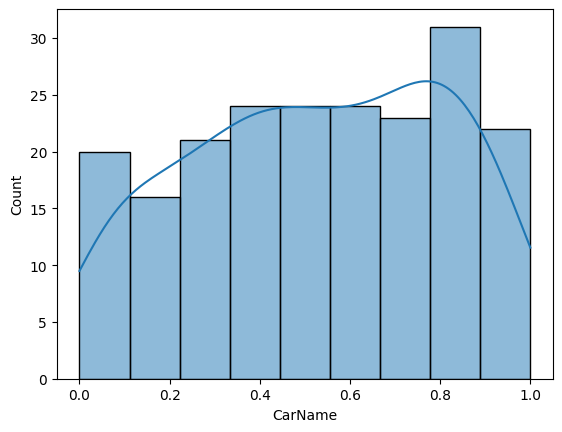

In [ ]:
sns.histplot(data=df_norm, x="CarName", kde=True)

In [ ]:
df_norm.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 205 entries, 0 to 204
Data columns (total 26 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   car_ID            205 non-null    float64
 1   symboling         205 non-null    float64
 2   CarName           205 non-null    float64
 3   fueltype          205 non-null    float64
 4   aspiration        205 non-null    float64
 5   doornumber        205 non-null    float64
 6   carbody           205 non-null    float64
 7   drivewheel        205 non-null    float64
 8   enginelocation    205 non-null    float64
 9   wheelbase         205 non-null    float64
 10  carlength         205 non-null    float64
 11  carwidth          205 non-null    float64
 12  carheight         205 non-null    float64
 13  curbweight        205 non-null    float64
 14  enginetype        205 non-null    float64
 15  cylindernumber    205 non-null    float64
 16  enginesize        205 non-null    float64
 1

car_ID            205 non-null    float64
 1            205 non-null    float64
 2             205 non-null    float64
 3           205 non-null    float64
 4           205 non-null    float64
 5              205 non-null    float64
 6           205 non-null    float64
 7       205 non-null    float64
 8            205 non-null    float64
 9            205 non-null    float64
 10            205 non-null    float64
 11           205 non-null    float64
 12          205 non-null    float64
 13          205 non-null    float64
 14      205 non-null    float64
 15          205 non-null    float64
 16          205 non-null    float64
 17           205 non-null    float64
 18              205 non-null    float64
 19    205 non-null    float64
 20          205 non-null    float64
 21             205 non-null    float64
 22             205 non-null    float64
 23  
 24       




In [ ]:
#modelo MRLS
function = 'price~CarName+highwaympg+citympg+peakrpm+horsepower+compressionratio+stroke+boreratio+fuelsystem+enginesize+cylindernumber+enginetype+curbweight+carheight+carwidth+carlength+wheelbase+enginelocation+drivewheel+carbody+doornumber+aspiration+fueltype+symboling'
model = smf.ols(formula=function, data=df_norm).fit()
print(model.summary())

                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.898
Model:                            OLS   Adj. R-squared:                  0.885
Method:                 Least Squares   F-statistic:                     66.24
Date:                Tue, 26 Nov 2024   Prob (F-statistic):           2.26e-76
Time:                        14:46:06   Log-Likelihood:                 275.56
No. Observations:                 205   AIC:                            -501.1
Df Residuals:                     180   BIC:                            -418.1
Df Model:                          24                                         
Covariance Type:            nonrobust                                         
                       coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------
Intercept           -0.1177      0.191  

In [ ]:
#modelo MRLS
function = 'price~CarName+highwaympg+citympg+peakrpm+horsepower+compressionratio+stroke+boreratio+fuelsystem+enginesize+cylindernumber+enginetype+curbweight+carheight+carwidth+carlength+wheelbase+enginelocation+drivewheel+carbody+doornumber+aspiration+symboling'
model = smf.ols(formula=function, data=df_norm).fit()
print(model.summary())

                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.898
Model:                            OLS   Adj. R-squared:                  0.885
Method:                 Least Squares   F-statistic:                     69.50
Date:                Tue, 26 Nov 2024   Prob (F-statistic):           2.70e-77
Time:                        14:46:25   Log-Likelihood:                 275.55
No. Observations:                 205   AIC:                            -503.1
Df Residuals:                     181   BIC:                            -423.4
Df Model:                          23                                         
Covariance Type:            nonrobust                                         
                       coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------
Intercept           -0.0960      0.077  

In [ ]:
#modelo MRLS
function = 'price~CarName+highwaympg+citympg+peakrpm+horsepower+compressionratio+stroke+boreratio+fuelsystem+enginesize+cylindernumber+enginetype+curbweight+carheight+carwidth+carlength+wheelbase+enginelocation+drivewheel+carbody+doornumber+aspiration'
model = smf.ols(formula=function, data=df_norm).fit()
print(model.summary())

                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.898
Model:                            OLS   Adj. R-squared:                  0.886
Method:                 Least Squares   F-statistic:                     73.03
Date:                Tue, 26 Nov 2024   Prob (F-statistic):           3.22e-78
Time:                        14:46:37   Log-Likelihood:                 275.52
No. Observations:                 205   AIC:                            -505.0
Df Residuals:                     182   BIC:                            -428.6
Df Model:                          22                                         
Covariance Type:            nonrobust                                         
                       coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------
Intercept           -0.0898      0.073  

In [ ]:
#modelo MRLS
function = 'price~CarName+highwaympg+citympg+peakrpm+horsepower+compressionratio+stroke+boreratio+fuelsystem+enginesize+cylindernumber+enginetype+curbweight+carheight+carwidth+wheelbase+enginelocation+drivewheel+carbody+doornumber+aspiration'
model = smf.ols(formula=function, data=df_norm).fit()
print(model.summary())

                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.898
Model:                            OLS   Adj. R-squared:                  0.887
Method:                 Least Squares   F-statistic:                     76.89
Date:                Tue, 26 Nov 2024   Prob (F-statistic):           3.76e-79
Time:                        14:46:51   Log-Likelihood:                 275.47
No. Observations:                 205   AIC:                            -506.9
Df Residuals:                     183   BIC:                            -433.8
Df Model:                          21                                         
Covariance Type:            nonrobust                                         
                       coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------
Intercept           -0.0943      0.071  

In [ ]:
#modelo MRLS
function = 'price~CarName+highwaympg+citympg+peakrpm+horsepower+compressionratio+stroke+boreratio+enginesize+cylindernumber+enginetype+curbweight+carheight+carwidth+wheelbase+enginelocation+drivewheel+carbody+doornumber+aspiration'
model = smf.ols(formula=function, data=df_norm).fit()
print(model.summary())

                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.898
Model:                            OLS   Adj. R-squared:                  0.887
Method:                 Least Squares   F-statistic:                     81.06
Date:                Tue, 26 Nov 2024   Prob (F-statistic):           4.63e-80
Time:                        14:47:09   Log-Likelihood:                 275.34
No. Observations:                 205   AIC:                            -508.7
Df Residuals:                     184   BIC:                            -438.9
Df Model:                          20                                         
Covariance Type:            nonrobust                                         
                       coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------
Intercept           -0.0872      0.069  

In [ ]:
#modelo MRLS
function = 'price~CarName+highwaympg+citympg+peakrpm+horsepower+compressionratio+stroke+boreratio+enginesize+enginetype+curbweight+carheight+carwidth+wheelbase+enginelocation+drivewheel+carbody+doornumber+aspiration'
model = smf.ols(formula=function, data=df_norm).fit()
print(model.summary())

                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.898
Model:                            OLS   Adj. R-squared:                  0.887
Method:                 Least Squares   F-statistic:                     85.65
Date:                Tue, 26 Nov 2024   Prob (F-statistic):           5.66e-81
Time:                        14:47:23   Log-Likelihood:                 275.18
No. Observations:                 205   AIC:                            -510.4
Df Residuals:                     185   BIC:                            -443.9
Df Model:                          19                                         
Covariance Type:            nonrobust                                         
                       coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------
Intercept           -0.0777      0.067  

In [ ]:
#modelo MRLS
function = 'price~CarName+highwaympg+peakrpm+horsepower+compressionratio+stroke+boreratio+enginesize+enginetype+curbweight+carheight+carwidth+wheelbase+enginelocation+drivewheel+carbody+doornumber+aspiration'
model = smf.ols(formula=function, data=df_norm).fit()
print(model.summary())

                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.898
Model:                            OLS   Adj. R-squared:                  0.888
Method:                 Least Squares   F-statistic:                     90.68
Date:                Tue, 26 Nov 2024   Prob (F-statistic):           7.09e-82
Time:                        14:47:35   Log-Likelihood:                 274.97
No. Observations:                 205   AIC:                            -511.9
Df Residuals:                     186   BIC:                            -448.8
Df Model:                          18                                         
Covariance Type:            nonrobust                                         
                       coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------
Intercept           -0.0812      0.067  

In [ ]:
#modelo MRLS
function = 'price~CarName+highwaympg+peakrpm+horsepower+compressionratio+stroke+boreratio+enginesize+enginetype+curbweight+carheight+carwidth+wheelbase+enginelocation+drivewheel+carbody+doornumber'
model = smf.ols(formula=function, data=df_norm).fit()
print(model.summary())

                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.898
Model:                            OLS   Adj. R-squared:                  0.888
Method:                 Least Squares   F-statistic:                     96.35
Date:                Tue, 26 Nov 2024   Prob (F-statistic):           8.32e-83
Time:                        14:47:48   Log-Likelihood:                 274.79
No. Observations:                 205   AIC:                            -513.6
Df Residuals:                     187   BIC:                            -453.8
Df Model:                          17                                         
Covariance Type:            nonrobust                                         
                       coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------
Intercept           -0.0773      0.066  

In [ ]:
#modelo MRLS
function = 'price~CarName+peakrpm+horsepower+compressionratio+stroke+boreratio+enginesize+enginetype+curbweight+carheight+carwidth+wheelbase+enginelocation+drivewheel+carbody+doornumber'
model = smf.ols(formula=function, data=df_norm).fit()
print(model.summary())

                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.897
Model:                            OLS   Adj. R-squared:                  0.889
Method:                 Least Squares   F-statistic:                     102.6
Date:                Tue, 26 Nov 2024   Prob (F-statistic):           1.02e-83
Time:                        14:47:59   Log-Likelihood:                 274.54
No. Observations:                 205   AIC:                            -515.1
Df Residuals:                     188   BIC:                            -458.6
Df Model:                          16                                         
Covariance Type:            nonrobust                                         
                       coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------
Intercept           -0.0455      0.047  

In [ ]:
#modelo MRLS
function = 'price~CarName+peakrpm+horsepower+compressionratio+stroke+boreratio+enginesize+enginetype+curbweight+carheight+carwidth+wheelbase+enginelocation+drivewheel+carbody+doornumber-1'
model = smf.ols(formula=function, data=df_norm).fit()
print(model.summary())

                                 OLS Regression Results                                
Dep. Variable:                  price   R-squared (uncentered):                   0.950
Model:                            OLS   Adj. R-squared (uncentered):              0.945
Method:                 Least Squares   F-statistic:                              222.5
Date:                Tue, 26 Nov 2024   Prob (F-statistic):                   3.03e-113
Time:                        14:48:09   Log-Likelihood:                          274.03
No. Observations:                 205   AIC:                                     -516.1
Df Residuals:                     189   BIC:                                     -462.9
Df Model:                          16                                                  
Covariance Type:            nonrobust                                                  
                       coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------

In [ ]:
#modelo MRLS
function = 'price~CarName+peakrpm+horsepower+compressionratio+stroke+boreratio+enginesize+curbweight+carheight+carwidth+wheelbase+enginelocation+drivewheel+carbody+doornumber-1'
model = smf.ols(formula=function, data=df_norm).fit()
print(model.summary())

                                 OLS Regression Results                                
Dep. Variable:                  price   R-squared (uncentered):                   0.949
Model:                            OLS   Adj. R-squared (uncentered):              0.945
Method:                 Least Squares   F-statistic:                              238.1
Date:                Tue, 26 Nov 2024   Prob (F-statistic):                   2.35e-114
Time:                        14:48:27   Log-Likelihood:                          273.81
No. Observations:                 205   AIC:                                     -517.6
Df Residuals:                     190   BIC:                                     -467.8
Df Model:                          15                                                  
Covariance Type:            nonrobust                                                  
                       coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------

In [ ]:
#modelo MRLS
function = 'price~CarName+peakrpm+horsepower+compressionratio+stroke+boreratio+enginesize+curbweight+carheight+carwidth+enginelocation+drivewheel+carbody+doornumber-1'
model = smf.ols(formula=function, data=df_norm).fit()
print(model.summary())

                                 OLS Regression Results                                
Dep. Variable:                  price   R-squared (uncentered):                   0.949
Model:                            OLS   Adj. R-squared (uncentered):              0.945
Method:                 Least Squares   F-statistic:                              254.1
Date:                Tue, 26 Nov 2024   Prob (F-statistic):                   3.31e-115
Time:                        14:48:40   Log-Likelihood:                          272.92
No. Observations:                 205   AIC:                                     -517.8
Df Residuals:                     191   BIC:                                     -471.3
Df Model:                          14                                                  
Covariance Type:            nonrobust                                                  
                       coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------

In [ ]:
#modelo MRLS
function = 'price~CarName+peakrpm+horsepower+compressionratio+stroke+enginesize+curbweight+carheight+carwidth+enginelocation+drivewheel+carbody+doornumber-1'
model = smf.ols(formula=function, data=df_norm).fit()
print(model.summary())

                                 OLS Regression Results                                
Dep. Variable:                  price   R-squared (uncentered):                   0.949
Model:                            OLS   Adj. R-squared (uncentered):              0.945
Method:                 Least Squares   F-statistic:                              272.1
Date:                Tue, 26 Nov 2024   Prob (F-statistic):                   5.21e-116
Time:                        14:48:52   Log-Likelihood:                          271.87
No. Observations:                 205   AIC:                                     -517.7
Df Residuals:                     192   BIC:                                     -474.5
Df Model:                          13                                                  
Covariance Type:            nonrobust                                                  
                       coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------

In [ ]:
x = df_norm[['CarName', 'peakrpm', 'horsepower', 'compressionratio', 'stroke', 'enginesize', 'curbweight', 'carheight', 'carwidth', 'enginelocation', 'drivewheel', 'carbody', 'doornumber']]

y = df_norm[["price"]]

#Separando os dados de Treino e Teste
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)

#Criando um Objeto de Regressão Linear
lr = LinearRegression()

#Treinando o Modelo
lr.fit(x_train,y_train)

# R²
r_sq = lr.score(x, y)
print('Coeficiente de Determinação (R²):', r_sq)

# MAE, MSE, RMSE TRAIN
y_pred_train = lr.predict(x_train)
print('MAE:', metrics.mean_absolute_error(y_train, y_pred_train))
print('MSE:', metrics.mean_squared_error(y_train, y_pred_train))
print('RMSE:', np.sqrt(metrics.mean_squared_error(y_train, y_pred_train)))

Coeficiente de Determinação (R²): 0.8931976578845873
MAE: 0.04635935360690482
MSE: 0.00352980932334703
RMSE: 0.05941219843893197


In [ ]:
# MAE, MSE, RMSE Teste
y_pred = lr.predict(x_test)
print('MAE:', metrics.mean_absolute_error(y_test, y_pred))
print('MSE:', metrics.mean_squared_error(y_test, y_pred))
print('RMSE:', np.sqrt(metrics.mean_squared_error(y_test, y_pred)))

MAE: 0.052050972399628616
MSE: 0.00678208799748317
RMSE: 0.08235343342862622
